In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Load Dataset

In [2]:
df=pd.read_csv(r'C:\Users\EB\Downloads\Loandata.csv')

# 2. Handle Missing Data

In [9]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [50]:
# Rename column

In [13]:
df.rename(columns={'ApplicantIncome': 'Income'}, inplace=True)

In [51]:
# Dropping column 

In [15]:
df = df.drop(columns=['CoapplicantIncome'])

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y


# 3. Visualize Key Features

<Axes: xlabel='LoanAmount', ylabel='Income'>

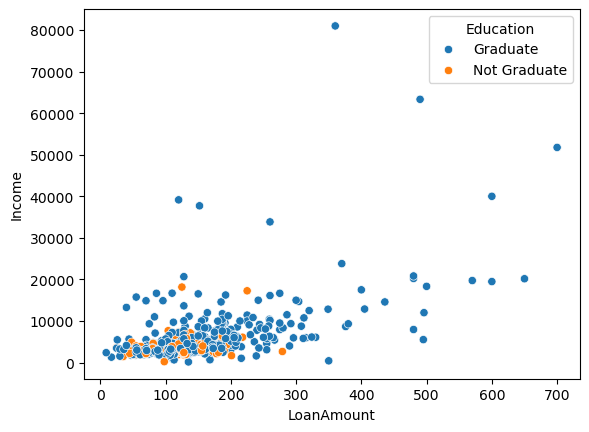

In [17]:
sns.scatterplot(x="LoanAmount", y="Income", data=df ,hue="Education")

Text(0.5, 1.0, 'Loan Amount Distribution')

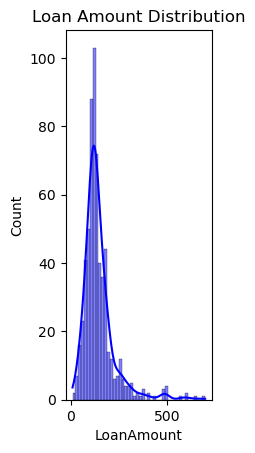

In [21]:
plt.subplot(1, 3, 1)
sns.histplot(df['LoanAmount'], kde=True, color='blue')
plt.title('Loan Amount Distribution')

# 4.Preprocessing

In [52]:
# Encode categorical variables

In [29]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
# Define Features (X) and Target (y)

In [32]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Training & Evaluation

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))

Logistic Regression Accuracy: 0.7723577235772358


# Confusion matrix

In [41]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[22 21]
 [ 7 73]]
              precision    recall  f1-score   support

           0       0.76      0.51      0.61        43
           1       0.78      0.91      0.84        80

    accuracy                           0.77       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.77      0.77      0.76       123

